In [1]:
import os
from joblib import Parallel, delayed
import time
import numpy as np
import pickle
import pylab as pl
import pandas as pd

# import jupyternotify
import subprocess
import concurrent.futures
import shutil

In [73]:
regions = ['us-central1-a', 'europe-west3-c', 'asia-south1-c']

In [88]:
for i in [0,1,2]:
    

    cmd = 'gcloud compute instances create flwr-'+f"{i:03}"+' \
    --project=ucr-ursa-major-lesani-lab \
    --zone='+regions[i]+' \
    --machine-type=e2-medium \
    --network-interface=network-tier=PREMIUM,stack-type=IPV4_ONLY,subnet=default \
    --maintenance-policy=MIGRATE \
    --provisioning-model=STANDARD \
    --service-account=961693926925-compute@developer.gserviceaccount.com \
    --scopes=https://www.googleapis.com/auth/devstorage.read_only,https://www.googleapis.com/auth/logging.write,https://www.googleapis.com/auth/monitoring.write,https://www.googleapis.com/auth/service.management.readonly,https://www.googleapis.com/auth/servicecontrol,https://www.googleapis.com/auth/trace.append \
    --create-disk=auto-delete=yes,boot=yes,device-name=instance-20240829-120659,image=projects/debian-cloud/global/images/debian-12-bookworm-v20240815,mode=rw,size=30,type=pd-balanced \
    --no-shielded-secure-boot \
    --shielded-vtpm \
    --shielded-integrity-monitoring \
    --labels=goog-ec-src=vm_add-gcloud \
    --reservation-affinity=any'
    
    os.system(cmd)

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-central1-a/instances/flwr-000].
 - Disk size: '30 GB' is larger than image size: '10 GB'. You might need to resize the root repartition manually if the operating system does not support automatic resizing. See https://cloud.google.com/compute/docs/disks/add-persistent-disk#resize_pd for details.



NAME      ZONE           MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP    EXTERNAL_IP    STATUS
flwr-000  us-central1-a  e2-medium                  10.128.15.215  34.69.145.143  RUNNING


Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/flwr-001].
 - Disk size: '30 GB' is larger than image size: '10 GB'. You might need to resize the root repartition manually if the operating system does not support automatic resizing. See https://cloud.google.com/compute/docs/disks/add-persistent-disk#resize_pd for details.



NAME      ZONE            MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
flwr-001  europe-west3-c  e2-medium                  10.156.0.30  34.159.31.246  RUNNING


Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/asia-south1-c/instances/flwr-002].
 - Disk size: '30 GB' is larger than image size: '10 GB'. You might need to resize the root repartition manually if the operating system does not support automatic resizing. See https://cloud.google.com/compute/docs/disks/add-persistent-disk#resize_pd for details.



NAME      ZONE           MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
flwr-002  asia-south1-c  e2-medium                  10.160.0.61  34.100.188.48  RUNNING


In [75]:
os.system('git add .; git commit -m "fc"; git push origin')

[main f4232a1f] fc
 4 files changed, 42155 insertions(+), 63496 deletions(-)


To github.com:tejas-shivanand-mane/flower.git
   bc4dd192..f4232a1f  main -> main


0

In [16]:
def initialize(i):
    command = 'gcloud compute ssh --zone "'+regions[i]+'" "flwr-'+f"{i:03}"+'" --project "ucr-ursa-major-lesani-lab" --command "sudo apt -y install git; git clone https://github.com/tejas-shivanand-mane/flower.git;cd flower"'
    os.system(command)

In [17]:
def git_pull(i):
    command = 'gcloud compute ssh --zone "'+regions[i]+'" "flwr-'+f"{i:03}"+'" --project "ucr-ursa-major-lesani-lab" --command "cd flower; git pull;"'
    os.system(command)

In [18]:
def setup(i):
    command = 'gcloud compute ssh --zone "'+regions[i]+'" "flwr-'+f"{i:03}"+'" --project "ucr-ursa-major-lesani-lab" --command "cd flower; sudo sh setup.sh"'
    os.system(command)

In [19]:
def clean(i):
    command = 'gcloud compute ssh --zone "us-central1-a" "flwr-'+f"{i:03}"+'" --project "ucr-ursa-major-lesani-lab" --command "sudo rm -r flower"'
    os.system(command)

In [13]:
time.sleep(45)

In [89]:
results = Parallel(n_jobs=60)(delayed(initialize)(i) for i in range(3))

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  git-man liberror-perl patch
Suggested packages:
  git-daemon-run | git-daemon-sysvinit git-doc git-email git-gui gitk gitweb
  git-cvs git-mediawiki git-svn ed diffutils-doc
The following NEW packages will be installed:
  git git-man liberror-perl patch
0 upgraded, 4 newly installed, 0 to remove and 0 not upgraded.
Need to get 9377 kB of archives.
After this operation, 48.0 MB of additional disk space will be used.
Get:1 file:/etc/apt/mirrors/debian.list Mirrorlist [30 B]
Get:2 https://deb.debian.org/debian bookworm/main amd64 liberror-perl all 0.17029-2 [29.0 kB]
Get:3 https://deb.debian.org/debian bookworm/main amd64 git-man all 1:2.39.2-1.1 [2049 kB]
Get:4 https://deb.debian.org/debian bookworm/main amd64 git amd64 1:2.39.2-1.1 [7171 kB]
Reading package lists...

Get:5 https://deb.debian.org/debian bookworm/main amd64 patch amd64 2.7.6-7 [128 kB]


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 




Fetched 9377 kB in 1s (12.3 MB/s)
Reading package lists...Selecting previously unselected package liberror-perl.
(Reading database ... 69231 files and directories currently installed.)
Preparing to unpack .../liberror-perl_0.17029-2_all.deb ...
Unpacking liberror-perl (0.17029-2) ...

Selecting previously unselected package git-man.
Preparing to unpack .../git-man_1%3a2.39.2-1.1_all.deb ...
Unpacking git-man (1:2.39.2-1.1) ...
Building dependency tree...Selecting previously unselected package git.
Preparing to unpack .../git_1%3a2.39.2-1.1_amd64.deb ...

Reading state information...
Unpacking git (1:2.39.2-1.1) ...
The following additional packages will be installed:
  git-man liberror-perl patch
Suggested packages:
  git-daemon-run | git-daemon-sysvinit git-doc git-email git-gui gitk gitweb
  git-cvs git-mediawiki git-svn ed diffutils-doc
The following NEW packages will be installed:
  git git-man liberror-perl patch

0 upgraded, 4 newly installed, 0 to remove and 0 not upgraded.
Need

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Processing triggers for man-db (2.11.2-2) ...
Fetched 9377 kB in 0s (33.2 MB/s)
Selecting previously unselected package liberror-perl.
(Reading database ... 69231 files and directories currently installed.)
Preparing to unpack .../liberror-perl_0.17029-2_all.deb ...
Unpacking liberror-perl (0.17029-2) ...
Fetched 9377 kB in 0s (24.9 MB/s)
Selecting previously unselected package git-man.


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Preparing to unpack .../git-man_1%3a2.39.2-1.1_all.deb ...
Unpacking git-man (1:2.39.2-1.1) ...
Selecting previously unselected package liberror-perl.
(Reading database ... 69231 files and directories currently installed.)
Preparing to unpack .../liberror-perl_0.17029-2_all.deb ...
Unpacking liberror-perl (0.17029-2) ...
Selecting previously unselected package git-man.
Preparing to unpack .../git-man_1%3a2.39.2-1.1_all.deb ...
Unpacking git-man (1:2.39.2-1.1) ...
Selecting previously unselected package git.
Preparing to unpack .../git_1%3a2.39.2-1.1_amd64.deb ...
Unpacking git (1:2.39.2-1.1) ...
Selecting previously unselected package git.
Preparing to unpack .../git_1%3a2.39.2-1.1_amd64.deb ...
Unpacking git (1:2.39.2-1.1) ...
Selecting previously unselected package patch.
Preparing to unpack .../patch_2.7.6-7_amd64.deb ...
Unpacking patch (2.7.6-7) ...
Setting up liberror-perl (0.17029-2) ...
Setting up patch (2.7.6-7) ...
Setting up git-man (1:2.39.2-1.1) ...
Setting up git (1:2.39.

Cloning into 'flower'...
Cloning into 'flower'...
Cloning into 'flower'...


In [113]:
os.system('git add .; git commit -m "fc"; git push origin')
results = Parallel(n_jobs=60)(delayed(git_pull)(i) for i in range(3))

[main 2c829beb] fc
 4 files changed, 1192 insertions(+), 65633 deletions(-)
 rewrite cli0_geo.out (95%)
 rewrite flwr.ipynb (99%)


To github.com:tejas-shivanand-mane/flower.git
   299c724b..2c829beb  main -> main
From https://github.com/tejas-shivanand-mane/flower
   299c724b..2c829beb  main       -> origin/main


Updating 299c724b..2c829beb
Fast-forward
 cli0_geo.out                                       |   693 +-
 .../client.py                                      |     4 +-
 .../server.py                                      |     4 +-
 flwr.ipynb                                         | 64532 +------------------
 4 files changed, 396 insertions(+), 64837 deletions(-)


From https://github.com/tejas-shivanand-mane/flower
   299c724b..2c829beb  main       -> origin/main


Updating 299c724b..2c829beb
Fast-forward
 cli0_geo.out                                       |   693 +-
 .../client.py                                      |     4 +-
 .../server.py                                      |     4 +-
 flwr.ipynb                                         | 64532 +------------------
 4 files changed, 396 insertions(+), 64837 deletions(-)


From https://github.com/tejas-shivanand-mane/flower
   299c724b..2c829beb  main       -> origin/main


Updating 299c724b..2c829beb
Fast-forward
 cli0_geo.out                                       |   693 +-
 .../client.py                                      |     4 +-
 .../server.py                                      |     4 +-
 flwr.ipynb                                         | 64532 +------------------
 4 files changed, 396 insertions(+), 64837 deletions(-)


In [106]:
# results = Parallel(n_jobs=60)(delayed(setup)(i) for i in range(3))

In [79]:
# results = Parallel(n_jobs=60)(delayed(clean)(i) for i in range(3))

In [39]:

def update_path(i):
    command = 'gcloud compute ssh --zone "'+regions[i]+'" "flwr-'+f"{i:03}"+\
    '" --project "ucr-ursa-major-lesani-lab" --command "printf export\ PATH=\$PATH:/home/user/anaconda3/bin/ >> /home/tejas/.bashrc && source /home/tejas/.bashrc"'
    os.system(command)

In [40]:
results = Parallel(n_jobs=60)(delayed(update_path)(i) for i in range(3))

In [29]:

def run_server(i):
    command = 'gcloud compute ssh --zone "'+regions[i]+'" "flwr-'+f"{i:03}"+\
    '" --project "ucr-ursa-major-lesani-lab" --command "cd flower/examples/pytorch-from-centralized-to-federated/; sudo nohup python server.py > nohup.out 2>&1 &"'
    os.system(command)

def run_client(i):
    command = 'gcloud compute ssh --zone "'+regions[i]+'" "flwr-'+f"{i:03}"+\
    '" --project "ucr-ursa-major-lesani-lab" --command "cd flower/examples/pytorch-from-centralized-to-federated/; sudo nohup python client.py --partition-id '+str(i-1)+' > nohup.out 2>&1 &"'
    os.system(command)
    
    
def kill_all(i):
    command = 'gcloud compute ssh --zone "'+regions[i]+'" "flwr-'+f"{i:03}"+\
    '" --project "ucr-ursa-major-lesani-lab" --command "cd flower/examples/pytorch-from-centralized-to-federated/;sudo killall python"'
    os.system(command)

In [31]:
run_server(0)

In [25]:
run_client(1)
run_client(0)


In [ ]:
results = Parallel(n_jobs=60)(delayed(kill_all)(i) for i in range(3))

In [ ]:
for i in [1]:
    command = 'gcloud compute scp --zone "'+regions[i] +'"'+' flwr-'+f"{i:03}"+':/home/tejas/flower/examples/nohup.out cli0_geo.out'
    os.system(command)

In [97]:
file_path = 'cli_0.out'

# Read the file and filter lines containing "test printout"
with open(file_path, 'r') as file:
    lines_with_test_printout = [line.strip() for line in file if "test printout" in line]

# Output the filtered lines
print(lines_with_test_printout)

import re


# Regex pattern to extract accuracy and time
pattern = r"accuracy: ([\d.]+), time: ([\d.]+)"

# Extract accuracy and time using regex
results = []
for line in lines_with_test_printout:
    match = re.search(pattern, line)
    if match:
        accuracy = float(match.group(1))
        time_taken = float(match.group(2))
        results.append((accuracy, time_taken))

# Output the extracted values
print(results)

results_local = np.array(results)

['INFO :      test printout, accuracy: 0.3594, time: 22.4384868144989', 'INFO :      test printout, accuracy: 0.4216, time: 41.3956823348999', 'INFO :      test printout, accuracy: 0.447, time: 61.331974029541016', 'INFO :      test printout, accuracy: 0.4692, time: 77.46779251098633', 'INFO :      test printout, accuracy: 0.4908, time: 93.7823965549469', 'INFO :      test printout, accuracy: 0.4978, time: 110.0973572731018', 'INFO :      test printout, accuracy: 0.5118, time: 126.80119705200195', 'INFO :      test printout, accuracy: 0.5208, time: 143.01470708847046', 'INFO :      test printout, accuracy: 0.5292, time: 159.29779744148254', 'INFO :      test printout, accuracy: 0.537, time: 175.201171875', 'INFO :      test printout, accuracy: 0.543, time: 192.5104637145996', 'INFO :      test printout, accuracy: 0.5482, time: 209.0459005832672', 'INFO :      test printout, accuracy: 0.5552, time: 231.20904684066772', 'INFO :      test printout, accuracy: 0.559, time: 257.5145978927612

In [107]:
file_path = 'cli0_geo.out'

# Read the file and filter lines containing "test printout"
with open(file_path, 'r') as file:
    lines_with_test_printout = [line.strip() for line in file if "test printout" in line]

# Output the filtered lines
print(lines_with_test_printout)

import re


# Regex pattern to extract accuracy and time
pattern = r"accuracy: ([\d.]+), time: ([\d.]+)"

# Extract accuracy and time using regex
results = []
for line in lines_with_test_printout:
    match = re.search(pattern, line)
    if match:
        accuracy = float(match.group(1))
        time_taken = float(match.group(2))
        results.append((accuracy, time_taken))

# Output the extracted values
print(results)

results_geo = np.array(results)

['INFO :      test printout, accuracy: 0.361, time: 28.15250515937805', 'INFO :      test printout, accuracy: 0.419, time: 48.966126441955566', 'INFO :      test printout, accuracy: 0.4546, time: 69.55271244049072', 'INFO :      test printout, accuracy: 0.4734, time: 89.98993444442749', 'INFO :      test printout, accuracy: 0.4818, time: 110.53451442718506', 'INFO :      test printout, accuracy: 0.5082, time: 131.2627308368683', 'INFO :      test printout, accuracy: 0.526, time: 152.10878705978394', 'INFO :      test printout, accuracy: 0.535, time: 175.24832224845886', 'INFO :      test printout, accuracy: 0.5444, time: 198.9635763168335', 'INFO :      test printout, accuracy: 0.551, time: 219.53922414779663', 'INFO :      test printout, accuracy: 0.5578, time: 240.00547242164612', 'INFO :      test printout, accuracy: 0.5672, time: 260.654185295105', 'INFO :      test printout, accuracy: 0.5706, time: 281.066123008728', 'INFO :      test printout, accuracy: 0.5764, time: 301.61035108

array([[3.61000000e-01, 2.81525052e+01],
       [4.19000000e-01, 4.89661264e+01],
       [4.54600000e-01, 6.95527124e+01],
       [4.73400000e-01, 8.99899344e+01],
       [4.81800000e-01, 1.10534514e+02],
       [5.08200000e-01, 1.31262731e+02],
       [5.26000000e-01, 1.52108787e+02],
       [5.35000000e-01, 1.75248322e+02],
       [5.44400000e-01, 1.98963576e+02],
       [5.51000000e-01, 2.19539224e+02],
       [5.57800000e-01, 2.40005472e+02],
       [5.67200000e-01, 2.60654185e+02],
       [5.70600000e-01, 2.81066123e+02],
       [5.76400000e-01, 3.01610351e+02],
       [5.79400000e-01, 3.22500974e+02],
       [5.85800000e-01, 3.43171600e+02],
       [5.87600000e-01, 3.63663803e+02],
       [5.89800000e-01, 3.84347392e+02],
       [5.86400000e-01, 4.05343612e+02],
       [5.87200000e-01, 4.25665665e+02],
       [5.88400000e-01, 4.46300167e+02],
       [5.91400000e-01, 4.67145357e+02],
       [5.99000000e-01, 4.87712849e+02],
       [6.08800000e-01, 5.08378631e+02],
       [6.104000

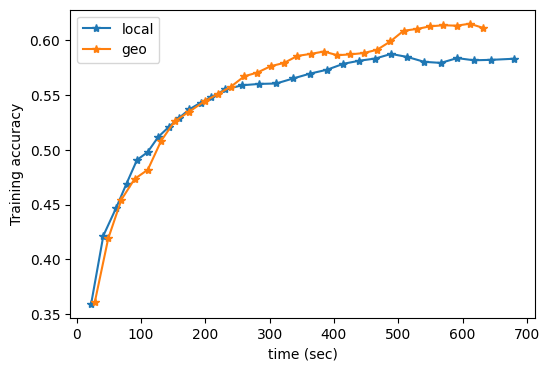

<Figure size 640x480 with 0 Axes>

In [112]:
pl.figure(figsize = (6,4))
pl.plot(np.array(list(results_local[:,1])), np.array(list(results_local[:,0])), '-*', label = 'local')
pl.plot(np.array(list(results_geo[:,1])), np.array(list(results_geo[:,0])), '-*', label = 'geo')
pl.legend()
pl.ylabel('Training accuracy')

pl.xlabel('time (sec)')
pl.show()
pl.clf()